<h2> Gaussian Process</h2>
<p>Code for implementing Gaussian Process with a dataset with standarized 6 features(+1 for offset parameter) describing a single car(such as used year, weight), and with one corresponding y, which is miles per gallon for that car.</p>
<p>Here we use the kernel: Kij = K(xi; xj) = exp{1/b*||xi-xj||2}</p>

In [2]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
PATH = 
X_TRAIN = pd.read_csv(PATH+"/X_train.csv",header = None)
X_TEST = pd.read_csv(PATH+"/X_test.csv",header = None)
Y_TRAIN = pd.read_csv(PATH+"/y_train.csv",header = None)
Y_TEST = pd.read_csv(PATH+"/y_test.csv",header = None)

In [5]:
x_train = np.matrix(X_TRAIN)
y_train = np.matrix(Y_TRAIN)
x_test = np.matrix(X_TEST)
y_test = np.matrix(Y_TEST)

def I(x):
    return np.identity(x) #n rows: to be define
SIGMA = 0 #to be define

In [6]:
#def normal(x,u,sigma_sq): #1D
#    return (1/np.sqrt(2*np.pi*sigma_sq))*np.exp(-pow(x-u,2)/(2*sigma_sq))

def kij(xi,xj,b): #x is the nth dimension
    return np.exp(-np.sum(np.power(xi-xj,2))/b)

def k_matrix(x1,x2):
    n = len(x1)
    m = len(x2)
    k = np.matrix(np.zeros(shape=(n,m)))
    for i in range(0,n):
        for j in range(0,m):
            k[i,j] = kij(x1[i],x2[j],b)
    return k


def pred(x_test,SIGMA,x_train,y_train):
    return k_matrix(x_test,x_train)*(SIGMA*I(len(x_train))+k_matrix(x_train,x_train)).I*y_train

def RMSE(y_test,y_pred):
    return np.sqrt(np.sum(np.power(y_test-y_pred,2))/len(y_test))

In [7]:
RMSE_result = np.zeros(shape=(6,10))

p = 0
for b in [5,7,9,11,13,15]:
    q = 0
    for SIGMA in range(1,11):
        y_pred = pred(x_test,SIGMA*0.1,x_train,y_train)
        RMSE_result[p,q] = RMSE(y_test,y_pred)
        q += 1
    p+=1
        

In [8]:
pd.DataFrame(RMSE_result,index=[5,7,9,11,13,15],columns=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]) #Lowest rmse: b=11,sigma=0.1

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
5,1.966276,1.933135,1.923420,1.922198,1.924769,1.929213,1.934634,1.940583,1.946820,1.953213
7,1.920163,1.904877,1.908080,1.915902,1.924804,1.933701,1.942254,1.950380,1.958093,1.965438
9,1.897649,1.902519,1.917648,1.932514,1.945699,1.957235,1.967403,1.976492,1.984741,1.992341
11,1.890507,1.914981,1.938849,1.957936,1.973216,1.985764,1.996375,2.005603,2.013835,2.021345
13,1.895849,1.935586,1.964597,1.985502,2.001314,2.013878,2.024310,2.033307,2.041317,2.048642
15,1.909603,1.959549,1.990804,2.011915,2.027370,2.039465,2.049463,2.058105,2.065845,2.072976


In [9]:
x_train = np.matrix(X_TRAIN)[:,3]
x_test = np.matrix(X_TEST)[:,3]

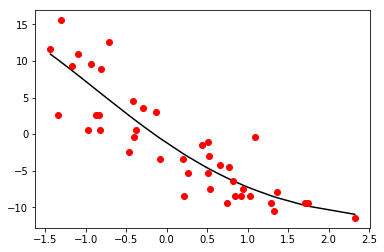

In [13]:
#see the 4th dimension
b = 11
SIGMA = 0.1
y_pred = pred(x_test,SIGMA,x_train,y_train)
order = np.argsort(x_test.T.tolist()[0])
plt.plot(np.array(x_test.T.tolist()[0])[order],np.array(y_pred.T.tolist()[0])[order],'k-', x_test.T.tolist()[0], y_test.T.tolist()[0], 'ro')